In [1]:
#import_fleet
#from import_fleet import SOCCOM
import eddy_matchup
from eddy_matchup import match
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.path as mpath
from matplotlib import colorbar, colors
import matplotlib.pyplot as plt
import pandas as pd

data_dir = 'data/'

#load SOCCCOM
SOCCOM = pd.read_pickle('data/unique_subset.pkl')


#find eddy matchups
eddy =match(SOCCOM['Lon [°E]'],
            SOCCOM['Lat [°N]'],
            SOCCOM.date,
            database='Chelton',
            latmin=-90,
            latmax=-35,
            hourrange=12,
            radiusrange=2)


ModuleNotFoundError: No module named 'eddy_matchup'

In [2]:
# Merge eddy matchup data with Saildrone dataset
SOCCOM['eddy_type'] = eddy.eddy_type
SOCCOM['eddy_ID'] = eddy.eddy_ID
SOCCOM['eddy_lat'] = eddy.eddy_lat
SOCCOM['eddy_lon'] = eddy.eddy_lon
SOCCOM['eddy_time'] = eddy.eddy_time
SOCCOM['eddy_amplitude'] = eddy.eddy_amplitude
SOCCOM['eddy_vmax'] = eddy.eddy_vmax
SOCCOM['eddy_rad_to_vmax'] = eddy.eddy_rad_to_vmax
SOCCOM['eddy_age'] = eddy.eddy_age
SOCCOM['eddy_dist_to_ctr'] = eddy.eddy_dist_to_ctr
SOCCOM.to_pickle(data_dir + 'SOCCOM_eddy_matchups.pkl')

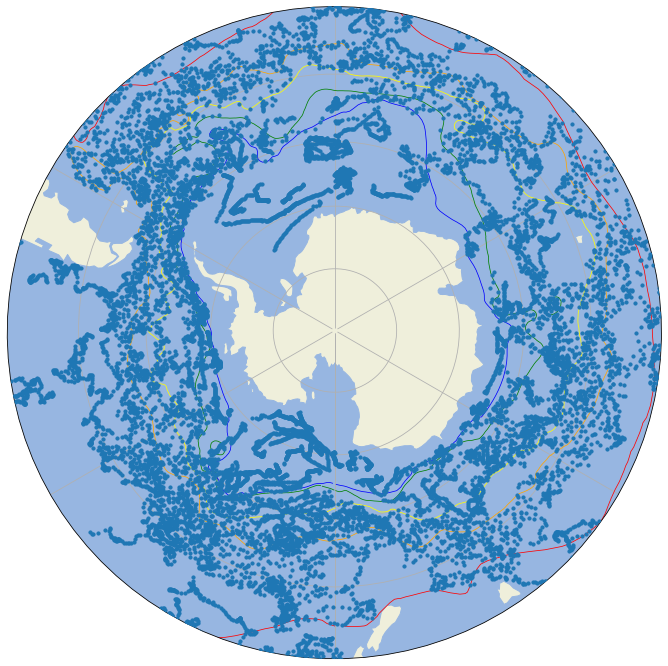

In [4]:
#Figure of SOCCOM floats

def load_orsi_fronts(data_dir):
    # Import the Southern Ocean fronts for mapping
    stf = pd.read_csv(data_dir + 'fronts/stf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    saf = pd.read_csv(data_dir + 'fronts/saf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    pf = pd.read_csv(data_dir + 'fronts/pf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    saccf = pd.read_csv(data_dir + 'fronts/saccf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    sbdy = pd.read_csv(data_dir + 'fronts/sbdy.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    
    return stf,saf,pf,saccf,sbdy

stf, saf, pf, saccf, sbdy = load_orsi_fronts(data_dir)

plt.figure(figsize =(12,12))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180,180,-90,-40], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(ccrs.PlateCarree(), draw_labels=True)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform = ax.transAxes)
plt.plot(stf['lon'], stf['lat'], color='Red', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(saf['lon'], saf['lat'], color='Orange', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(pf['lon'], pf['lat'], color='Yellow', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(saccf['lon'], saccf['lat'], color='Green', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(sbdy['lon'], sbdy['lat'], color='Blue', transform=ccrs.PlateCarree(), linewidth=.75)

# Plot eddy matchups with red = cyclonic, blue = anticyclonic, white = no eddy
#colors = {-1:'red', 1:'blue', 0:'white'}
#edgecolors = colors,
            
#edgecolors=SOCCOM.eddy_type.map(colors)
plt.scatter(SOCCOM['Lon [°E]'], SOCCOM['Lat [°N]'],  transform=ccrs.PlateCarree(), s=10, zorder=1001)

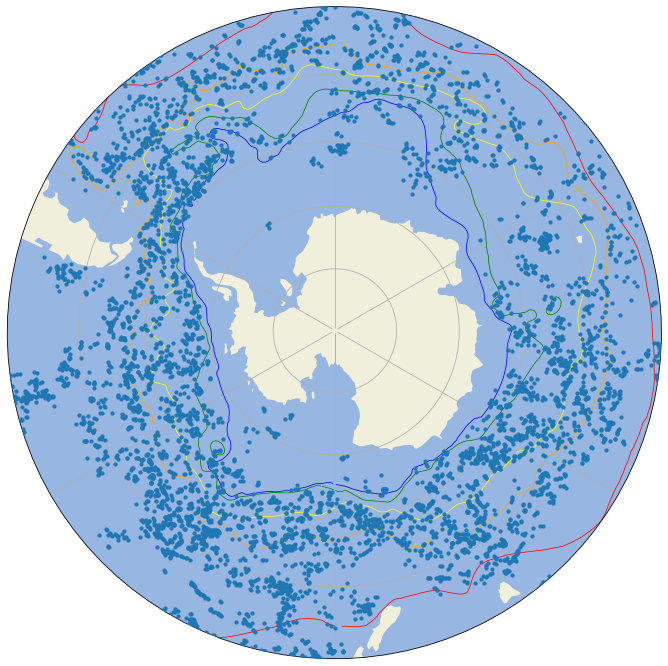

In [8]:
#Figure of eddy match up locations

def load_orsi_fronts(data_dir):
    # Import the Southern Ocean fronts for mapping
    stf = pd.read_csv(data_dir + 'fronts/stf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    saf = pd.read_csv(data_dir + 'fronts/saf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    pf = pd.read_csv(data_dir + 'fronts/pf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    saccf = pd.read_csv(data_dir + 'fronts/saccf.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    sbdy = pd.read_csv(data_dir + 'fronts/sbdy.txt', header=None, sep='\s+', na_values='%', names=['lon','lat'])
    
    return stf,saf,pf,saccf,sbdy

stf, saf, pf, saccf, sbdy = load_orsi_fronts(data_dir)

plt.figure(figsize =(12,12))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-180,180,-90,-40], ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.gridlines(ccrs.PlateCarree(), draw_labels=True)

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax.set_boundary(circle, transform = ax.transAxes)
plt.plot(stf['lon'], stf['lat'], color='Red', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(saf['lon'], saf['lat'], color='Orange', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(pf['lon'], pf['lat'], color='Yellow', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(saccf['lon'], saccf['lat'], color='Green', transform=ccrs.PlateCarree(), linewidth=.75)
plt.plot(sbdy['lon'], sbdy['lat'], color='Blue', transform=ccrs.PlateCarree(), linewidth=.75)

# Plot eddy matchups with red = cyclonic, blue = anticyclonic, white = no eddy
colors = {-1:'red', 1:'blue', 0:'white'}
#edgecolors=SOCCOM_unique.eddy_type.map(colors),
            
plt.scatter(SOCCOM['eddy_lon'], SOCCOM['eddy_lat'], 
            transform=ccrs.PlateCarree(),s=10, zorder=1001)


